In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
data = load_breast_cancer()

In [14]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
x, y = data.data, data.target

In [15]:
pd.DataFrame(x,columns=data.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
lrl1 = LR(penalty='l1',solver='liblinear',C=0.5,max_iter=1000)
lrl2 = LR(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

In [19]:
lrl1.fit(x,y)
(lrl1.coef_==0).sum()

20

In [20]:
lrl2.fit(x,y)
(lrl2.coef_==0).sum()

0

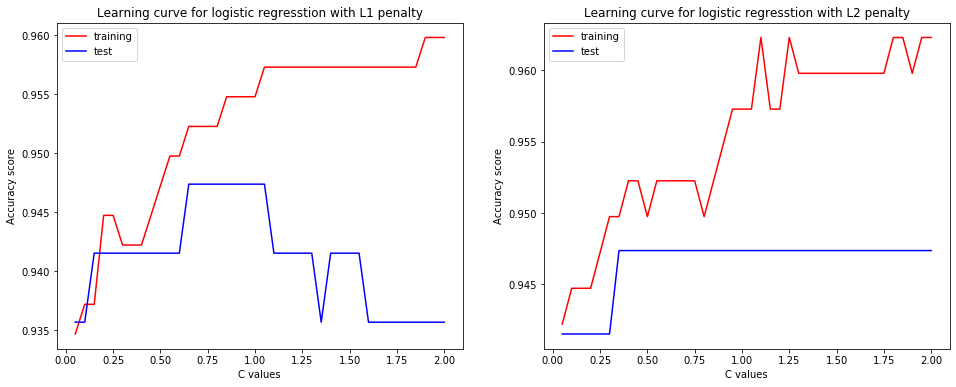

In [32]:
l1 = []
l2 = []
l1test = []
l2test = []

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=10)
cvalues = np.linspace(0.05,2,40) 

for i in cvalues:
    lrl1 = LR(penalty='l1',solver='liblinear',C=i,max_iter=1000)
    lrl2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=1000)
    
    lrl1.fit(xtrain,ytrain)
    lrl2.fit(xtrain,ytrain)
    
    l1.append(accuracy_score(lrl1.predict(xtrain),ytrain))
    l1test.append(accuracy_score(lrl1.predict(xtest),ytest))
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest),ytest))
    
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(cvalues, l1, c='red',label='training')
plt.plot(cvalues, l1test, c='blue', label='test')
plt.xlabel('C values')
plt.ylabel('Accuracy score')
plt.legend()
plt.title('Learning curve for logistic regresstion with L1 penalty')

plt.subplot(1,2,2)
plt.plot(cvalues, l2, c='red',label='training')
plt.plot(cvalues, l2test, c='blue', label='test')
plt.xlabel('C values')
plt.ylabel('Accuracy score')
plt.legend()
plt.title('Learning curve for logistic regresstion with L2 penalty')

plt.show()
